<a href="https://colab.research.google.com/github/Tizzy1999/ml2019/blob/master/knn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KNN**
**Algorithm**:


1.   calcualte distance
2.   find n nearest neighbors
3.   vote for labels


![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

**Features of KNN**:
* *non-parametric*: no assumption for underlying data distribution. In other words, the model structure determined from the dataset.
* *lazy learning*: does not need any training data points for model generation. All training data used in testing phase. This makes trianing faster and testing phase slower and costlier.

In [0]:
# import scikit-learn dataset library
from sklearn import datasets
# load dataset
wine = datasets.load_wine()

# **Dataset** #


In [0]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [0]:
# print the label species
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [0]:
# print the top 5 records of the wine data
print(wine.data[:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [0]:
# print the labels (the value of the target)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [0]:
print(wine.data.shape)

(178, 13)


#**Split Data**#

In [0]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
# To compare the model performance before and after feature scaling, we keep a copy of original data without scaling
X_train0, X_test0, y_train0, y_test0 = train_test_split(wine.data, wine.target, test_size=0.3)

# **Feature Scaling**
Scaling the features so that all of them can be uniformly evaluated.

> Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.





In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train[0:3])

[[-0.97880971 -0.78086672  0.61215671 -0.20720137  0.38541331 -0.62669301
  -0.26397805  0.64640944 -1.03494109 -0.88429718  2.04359984 -0.54997831
  -1.20234304]
 [-0.67891743 -0.63876072 -0.60236221  0.8089048   0.67244785 -0.45347938
   0.070336   -0.24150846  0.02626454 -1.26576549  0.40340187  0.50611072
  -1.23415649]
 [ 0.34071633  1.73263308 -0.35231419  0.08311468  1.53355146 -1.09909382
  -1.30625125  0.48496983 -0.44944833  2.22316938 -1.57324696 -1.51926551
   0.32470241]]


# **Building Model**

In [0]:
# Build knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
# Train model based on scaled data
knn = KNeighborsClassifier(n_neighbors=5 )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Train model without scaling
knn0 = KNeighborsClassifier(n_neighbors=5)
knn0.fit(X_train0, y_train0)
y_pred0 = knn0.predict(X_test0)

In [0]:
# Model Evaluation for k=5
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("Accuracy(with feature scaling):",metrics.accuracy_score(y_test, y_pred))
# Evaluate model based on data without feature scaling
print(confusion_matrix(y_test0, y_pred0))
print("Accuracy(without feature scaling):",metrics.accuracy_score(y_test0, y_pred0))



[[20  1  0]
 [ 1 17  0]
 [ 0  0 15]]
Accuracy(with feature scaling): 0.9629629629629629
[[18  0  1]
 [ 2 12  7]
 [ 2  4  8]]
Accuracy(without feature scaling): 0.7037037037037037


# **Copare Error with K**

Text(0, 0.5, 'Mean Error')

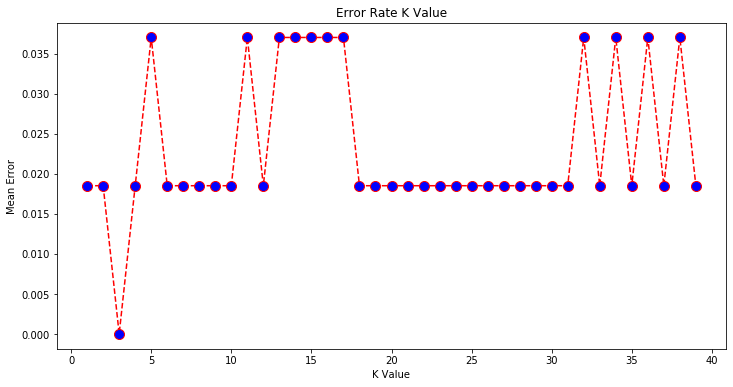

In [0]:
# Comparing Error Rate with the K value
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
error = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# **Pros**



*   eager and lazy learner
*   no need to train
*   simple and instance-based learning algorithm

# **Cons**

* slower and costlier testing phase
* require data scaling becasue KNN uses the Euclidean distance between two data points. And Euclidean distance is sensitive to magnitudes.
* not suitable for large dimensional data


